In [3]:
# Install necessary packages (only run once in Colab)
install.packages(c("tidyverse", "ggplot2", "moments", "psych", "ggpubr", "reshape2", "corrplot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	995 obs. of  19 variables:
 $ VendorID             : int  2 1 1 1 1 1 2 1 2 2 ...
 $ tpep_pickup_datetime : chr  "2024-01-01 00:57:55" "2024-01-01 00:03:00" "2024-01-01 00:17:06" "2024-01-01 00:36:38" ...
 $ tpep_dropoff_datetime: chr  "2024-01-01 01:17:43" "2024-01-01 00:09:36" "2024-01-01 00:35:01" "2024-01-01 00:44:56" ...
 $ passenger_count      : num  1 1 1 1 1 1 2 0 1 1 ...
 $ trip_distance        : num  1.72 1.8 4.7 1.4 0.8 ...
 $ RatecodeID           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ store_and_fwd_flag   : chr  "N" "N" "N" "N" ...
 $ PULocationID         : int  186 140 236 79 211 148 138 246 161 113 ...
 $ DOLocationID         : int  79 236 79 211 148 141 181 231 261 113 ...
 $ payment_type         : int  2 1 1 1 1 1 1 2 2 2 ...
 $ fare_amount          : num  17.7 10 23.3 10 7.9 29.6 45.7 25.4 31 3 ...
 $ extra                : num  1 3.5 3.5 3.5 3.5 3.5 6 3.5 1 1 ...
 $ mta_tax              : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ tip_amount         

    VendorID     tpep_pickup_datetime tpep_dropoff_datetime passenger_count
 Min.   :1.000   Length:995           Length:995            Min.   :0.000  
 1st Qu.:1.000   Class :character     Class :character      1st Qu.:1.000  
 Median :2.000   Mode  :character     Mode  :character      Median :1.000  
 Mean   :1.704                                              Mean   :1.582  
 3rd Qu.:2.000                                              3rd Qu.:2.000  
 Max.   :2.000                                              Max.   :6.000  
 trip_distance      RatecodeID     store_and_fwd_flag  PULocationID  
 Min.   : 0.000   Min.   : 1.000   Length:995         Min.   :  4.0  
 1st Qu.: 1.125   1st Qu.: 1.000   Class :character   1st Qu.:114.0  
 Median : 1.960   Median : 1.000   Mode  :character   Median :161.0  
 Mean   : 2.890   Mean   : 1.139                      Mean   :165.3  
 3rd Qu.: 3.400   3rd Qu.: 1.000                      3rd Qu.:236.0  
 Max.   :23.900   Max.   :99.000                

           Column      Mean Median  Mode   Min    Max         SD    Variance
1 passenger_count  1.581910   1.00  1.00   0.0   6.00  0.9116253   0.8310607
2   trip_distance  2.890472   1.96  0.90   0.0  23.90  3.1252678   9.7672989
3     fare_amount 18.278593  14.20  6.50 -47.8 180.00 14.9164222 222.4996519
4    total_amount 26.847538  22.20 16.32 -52.8 217.20 18.0920178 327.3211081
5      tip_amount  3.483146   3.00  0.00   0.0  80.00  4.1955070  17.6022789
6           extra  1.741457   1.00  1.00  -1.0   7.75  1.2557423   1.5768887
  Skewness   Kurtosis Count Missing
1 1.661820   5.807676   995       0
2 3.283213  16.899412   995       0
3 3.007897  23.629775   995       0
4 3.020781  23.086712   995       0
5 7.317185 117.900108   995       0
6 1.147887   3.708360   995       0


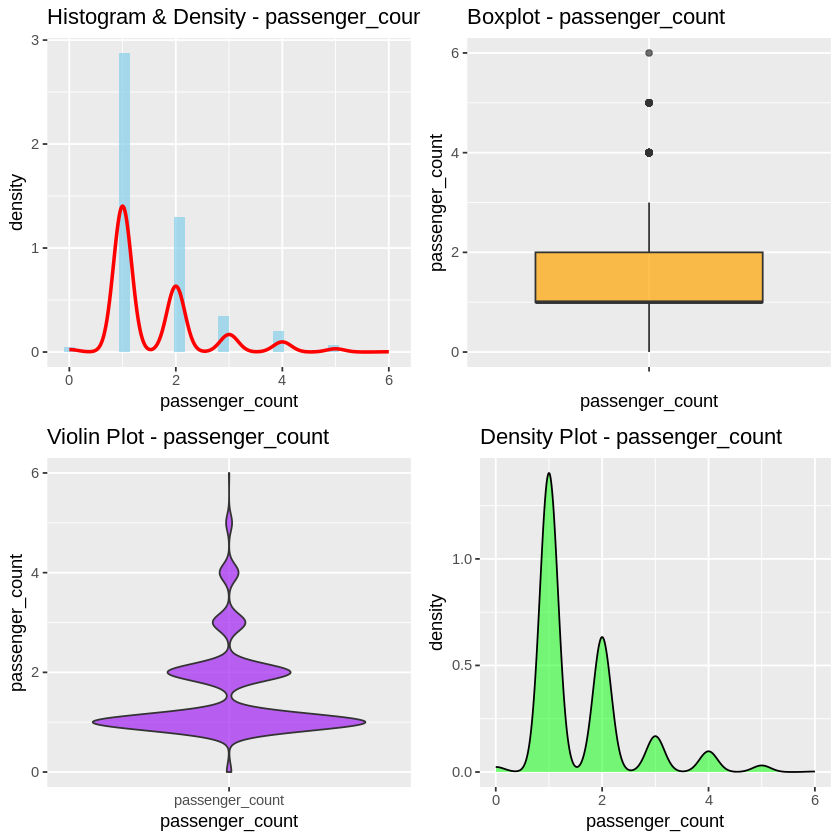

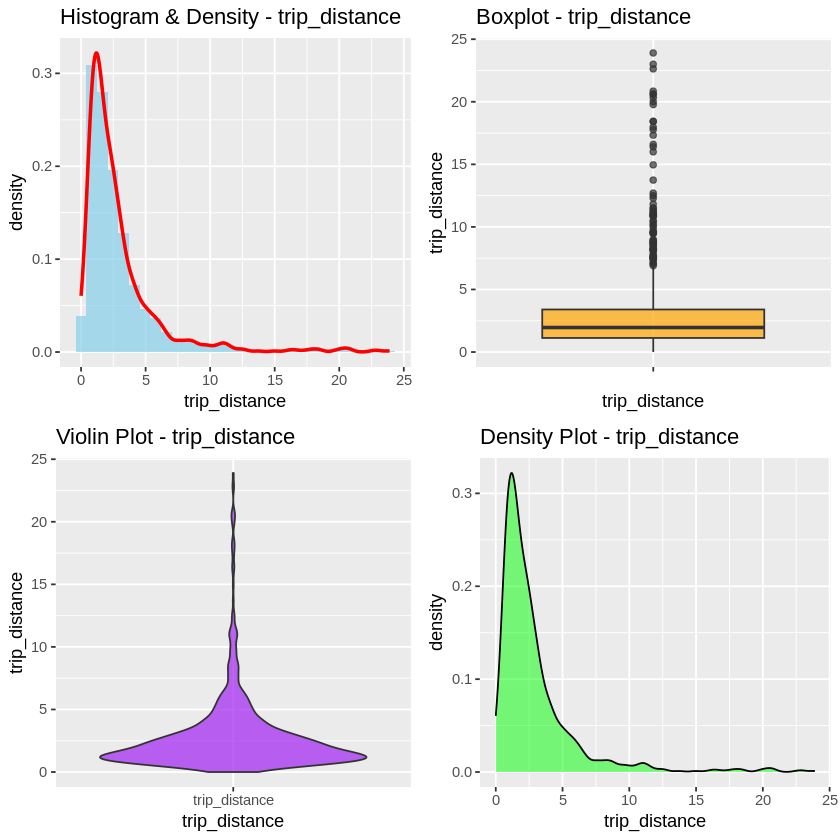

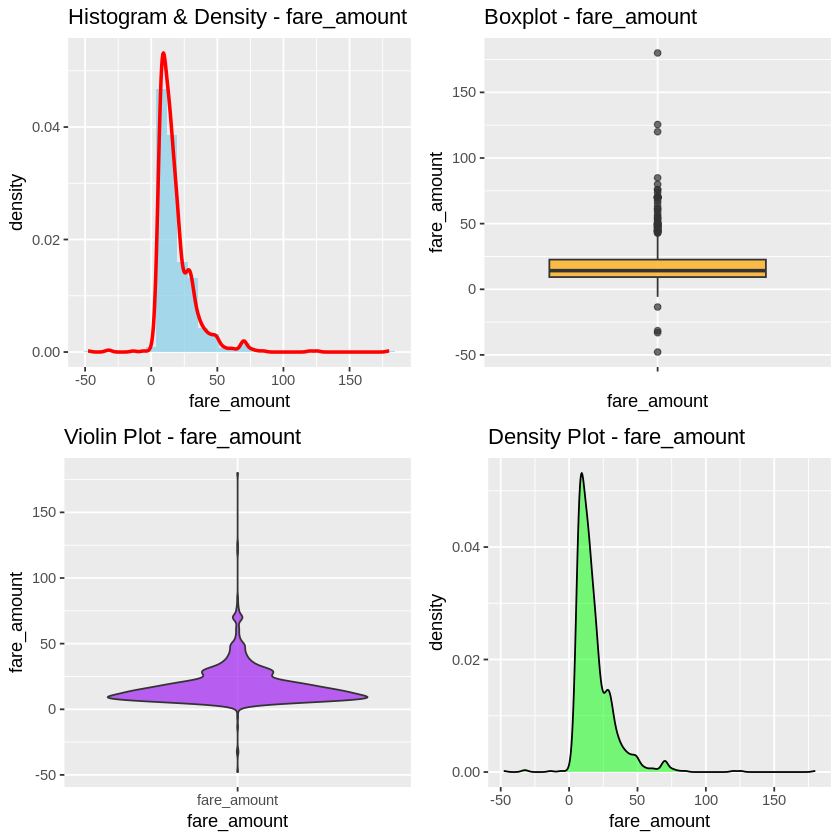

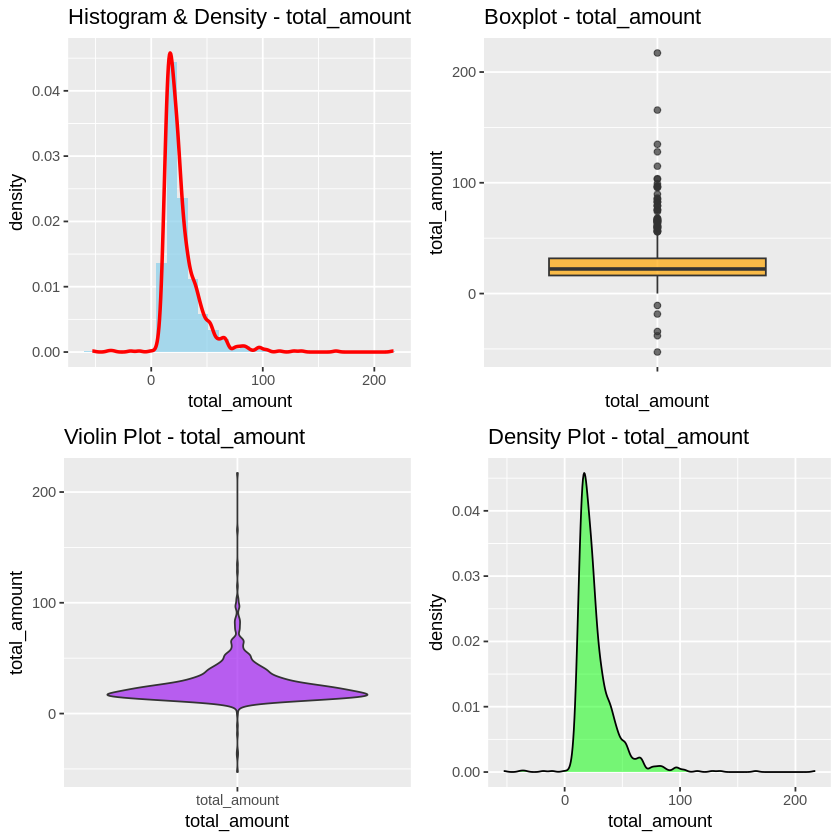

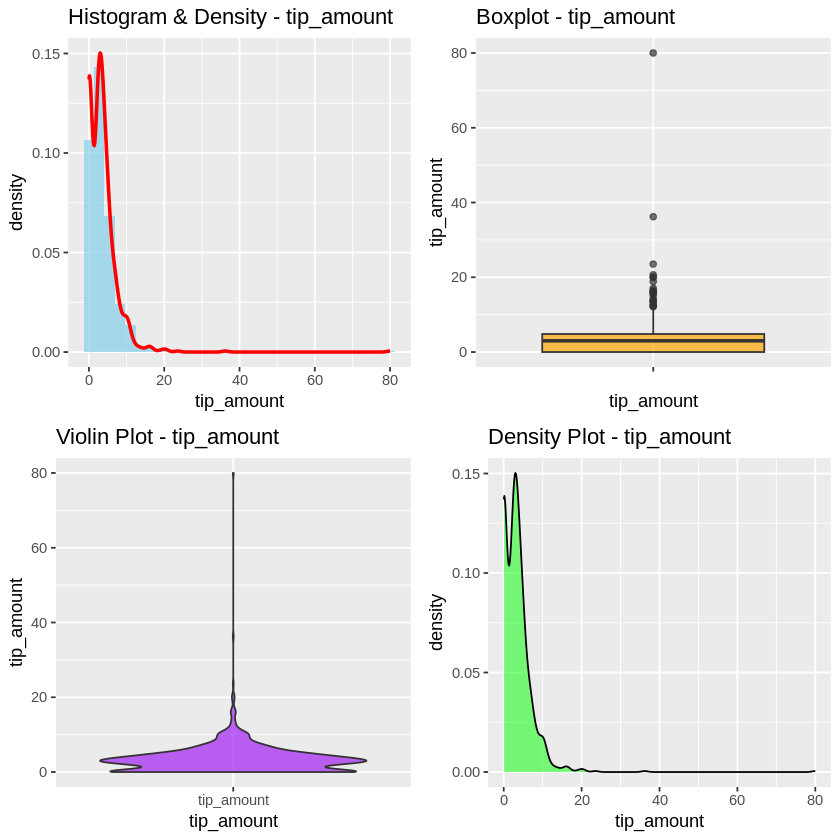

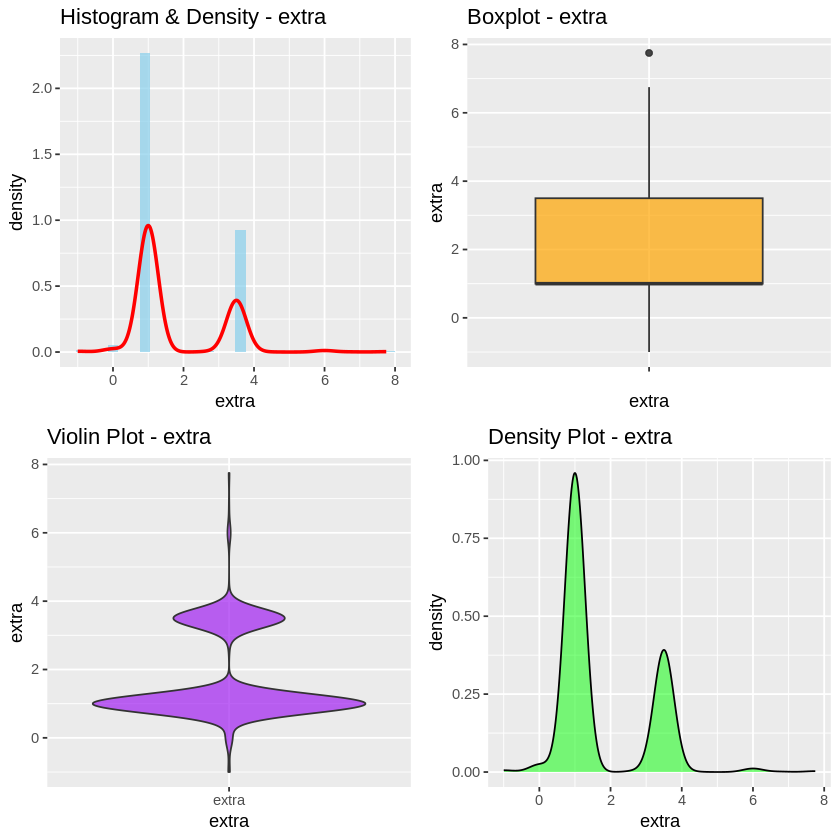

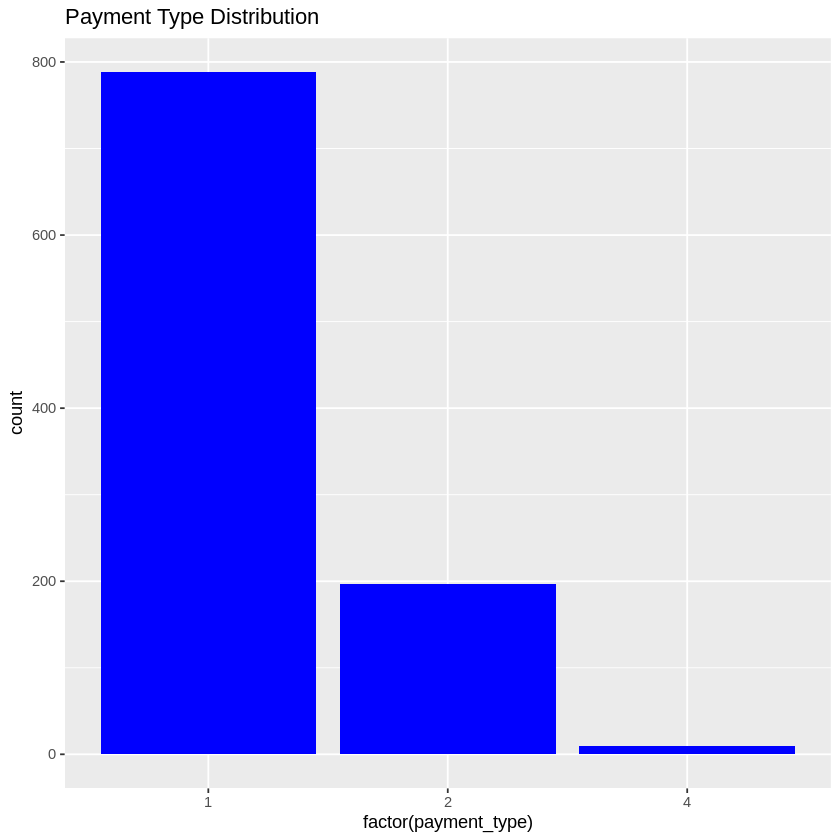

$`Trip Distance CI`
[1] 2.696047 3.084898
attr(,"conf.level")
[1] 0.95

$`Fare Amount CI`
[1] 17.35063 19.20656
attr(,"conf.level")
[1] 0.95

$`Tip Amount CI`
[1] 3.222140 3.744152
attr(,"conf.level")
[1] 0.95


	One Sample t-test

data:  taxi$tip_amount
t = 11.151, df = 994, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 2
95 percent confidence interval:
 3.222140 3.744152
sample estimates:
mean of x 
 3.483146 


	Welch Two Sample t-test

data:  fare_amount by payment_type
t = 0.24718, df = 282.28, p-value = 0.8049
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -2.137620  2.751579
sample estimates:
mean in group 1 mean in group 2 
       18.46739        18.16041 



Warning message in chisq.test(tbl):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tbl
X-squared = 6.8535, df = 8, p-value = 0.5525



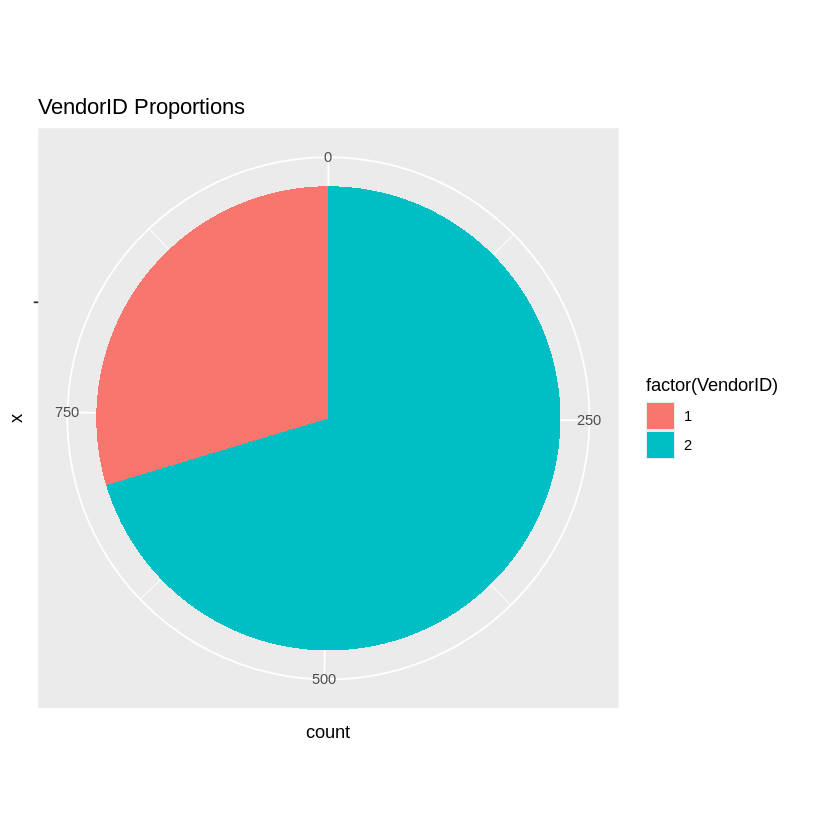

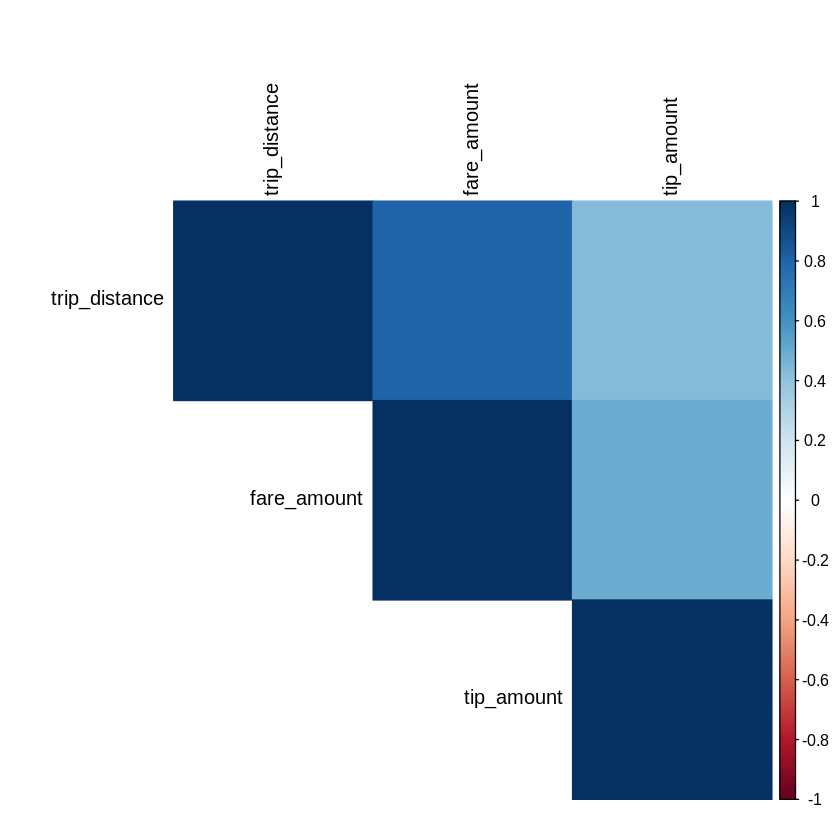

In [6]:
# ================================
# NYC Yellow Taxi Data EDA in R
# ================================

# Load libraries
library(tidyverse)
library(moments)   # for skewness and kurtosis
library(psych)     # for descriptive statistics
library(ggpubr)    # for arranging plots
library(reshape2)  # for correlation heatmap
library(corrplot)

# ================================
# Load Dataset
# ================================
# Replace "taxi_data.csv" with your actual filename
taxi <- read.csv("yellow_tripdata_sample.csv")

# Quick check
str(taxi)
summary(taxi)

# ================================
# Part A: Descriptive Statistics
# ================================

num_cols <- c("passenger_count", "trip_distance", "fare_amount",
              "total_amount", "tip_amount", "extra")

# Function to compute descriptive statistics
desc_stats <- function(col) {
  data <- taxi[[col]]
  stats <- data.frame(
    Column = col,
    Mean = mean(data, na.rm = TRUE),
    Median = median(data, na.rm = TRUE),
    Mode = as.numeric(names(sort(table(data), decreasing = TRUE)[1])),
    Min = min(data, na.rm = TRUE),
    Max = max(data, na.rm = TRUE),
    SD = sd(data, na.rm = TRUE),
    Variance = var(data, na.rm = TRUE),
    Skewness = skewness(data, na.rm = TRUE),
    Kurtosis = kurtosis(data, na.rm = TRUE),
    Count = length(data),
    Missing = sum(is.na(data))
  )
  return(stats)
}

desc_results <- do.call(rbind, lapply(num_cols, desc_stats))
print(desc_results)

# ================================
# Part A2: Visualizations
# ================================

for (col in num_cols) {

  # Histogram + Density
  p1 <- ggplot(taxi, aes(x = .data[[col]])) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", alpha = 0.7) +
    geom_density(color = "red", size = 1) +
    labs(title = paste("Histogram & Density -", col))

  # Boxplot
  p2 <- ggplot(taxi, aes(y = .data[[col]], x = "")) +
    geom_boxplot(fill = "orange", alpha = 0.7) +
    labs(title = paste("Boxplot -", col), x = col)

  # Violin plot (fix: use dummy x variable)
  p3 <- ggplot(taxi, aes(x = col, y = .data[[col]])) +
    geom_violin(fill = "purple", alpha = 0.7) +
    labs(title = paste("Violin Plot -", col), x = col, y = col)

  # Density plot
  p4 <- ggplot(taxi, aes(x = .data[[col]])) +
    geom_density(fill = "green", alpha = 0.5) +
    labs(title = paste("Density Plot -", col))

  print(ggarrange(p1, p2, p3, p4, ncol = 2, nrow = 2))
}

# Bar chart: Payment_type
ggplot(taxi, aes(x = factor(payment_type))) +
  geom_bar(fill = "blue") +
  labs(title = "Payment Type Distribution")

# Pie chart: VendorID
vendor_count <- taxi %>% group_by(VendorID) %>% summarise(count = n())
ggplot(vendor_count, aes(x = "", y = count, fill = factor(VendorID))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  labs(title = "VendorID Proportions")

# ================================
# Part B: Inferential Statistics
# ================================

# 1. Confidence Intervals
mean_ci <- function(x) {
  t.test(x, conf.level = 0.95)$conf.int
}
ci_trip <- mean_ci(taxi$trip_distance)
ci_fare <- mean_ci(taxi$fare_amount)
ci_tip <- mean_ci(taxi$tip_amount)

list("Trip Distance CI" = ci_trip,
     "Fare Amount CI" = ci_fare,
     "Tip Amount CI" = ci_tip)

# 2. Hypothesis Testing
# (a) One-sample t-test: Tip amount vs $2
t_test_tip <- t.test(taxi$tip_amount, mu = 2)
print(t_test_tip)

# (b) Two-sample t-test: Fare amount by Payment_type
# Filter data to include only two payment types for the t-test
taxi_filtered <- taxi %>% filter(payment_type %in% c(1, 2))
fare_test <- t.test(fare_amount ~ payment_type, data = taxi_filtered)
print(fare_test)

# (c) Chi-square test: Payment_type vs RateCodeID
tbl <- table(taxi$payment_type, taxi$RatecodeID)
chi_test <- chisq.test(tbl)
print(chi_test)

# 3. Correlation Analysis
cor_trip_fare <- cor(taxi$trip_distance, taxi$fare_amount, use = "complete.obs", method = "pearson")
cor_fare_tip <- cor(taxi$fare_amount, taxi$tip_amount, use = "complete.obs", method = "pearson")

cor_matrix <- taxi %>%
  select(trip_distance, fare_amount, tip_amount) %>%
  cor(use = "complete.obs")

corrplot(cor_matrix, method = "color", type = "upper", tl.col = "black")